In [2]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

def badToGood(bad, everything):
    return bad/everything

#https://pages.uoregon.edu/soper/Light/luminosity.html
def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4))
    return math.log10(math.sqrt(ans))


In [3]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 125 and 135 AND 
#DEC between 15 and 25 AND 
#parallax > 4 AND parallax < 8
beehive = pd.read_csv("beehivefinal.csv")
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'x'] = beehive.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
beehive.loc[:, 'y'] = beehive.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
beehive.loc[:, 'z'] = beehive.apply(lambda r: z(r['R'], r['b']), axis=1)
beehive.loc[:, 'magnitude'] = beehive.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
beehive.loc[:, 'luminosity'] = beehive.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
beehive.loc[:, 'solar_luminosity'] = beehive.apply(lambda x: solar_lum(x['luminosity']), axis=1)
beehive.loc[:, 'radius'] = beehive.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1)

In [4]:
asu = pd.read_csv("asubeehive.csv")
a = asu.head(5)

In [5]:
#hhmmss to deg
def htodeg(ra):
    hms = ra.split()
    h = (15*int(hms[0]))
    m = (15*int(hms[1])/60)
    s = (15*float(hms[2])/3600)
    return h+m+s

#degmmss to deg
def dtodeg(dec):
    dms = dec.split()
    if dms[0][:1] == '+':
        deg = dms[0][1:]
    else:
        deg = dms[0]
    m = (int(dms[1])/60)
    s = (float(dms[2])/3600)
    return int(deg)+m+s

asu.loc[:, 'ra_deg'] = asu.apply(lambda x: htodeg(x['RA_ICRS']), axis=1)
asu.loc[:, 'dec_deg'] = asu.apply(lambda x: dtodeg(x['DE_ICRS']), axis=1)

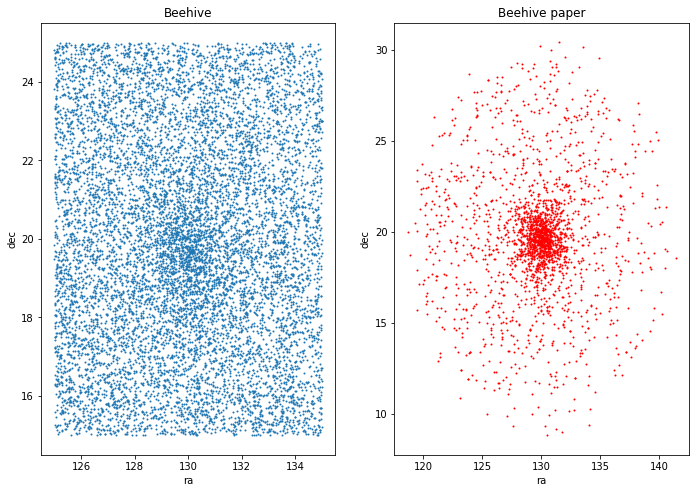

In [6]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(beehive['ra'], beehive['dec'], s=1)
ax.set_title('Beehive')
ax.set_xlabel("ra")
ax.set_ylabel("dec")

ax2 = fig.add_subplot(122)
ax2.scatter(asu['ra_deg'], asu['dec_deg'], s=1, color='red')
ax2.set_title('Beehive paper')
ax2.set_xlabel("ra")
ax2.set_ylabel("dec")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

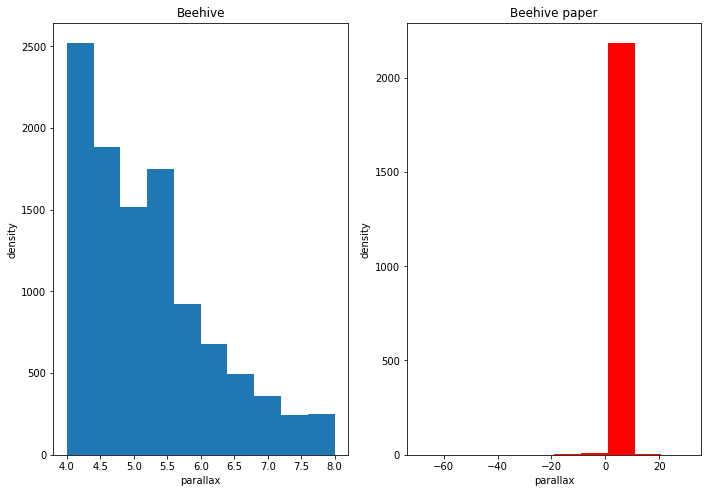

In [7]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.hist(beehive['parallax'])
ax.set_title('Beehive')
ax.set_xlabel("parallax")
ax.set_ylabel("density")

ax2 = fig.add_subplot(122)
ax2.hist(asu['PlxCP'], color='red')
ax2.set_title('Beehive paper')
ax2.set_xlabel("parallax")
ax2.set_ylabel("density")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

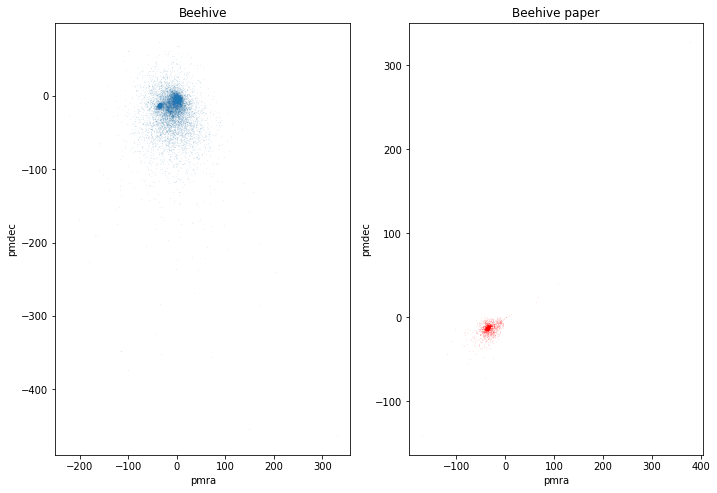

In [8]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(beehive['pmra'], beehive['pmdec'], s=0.001)
ax.set_title('Beehive')
ax.set_xlabel("pmra")
ax.set_ylabel("pmdec")

ax2 = fig.add_subplot(122)
ax2.scatter(asu['pmRACP'], asu['pmDECP'], s=0.001, color='red')
ax2.set_title('Beehive paper')
ax2.set_xlabel("pmra")
ax2.set_ylabel("pmdec")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

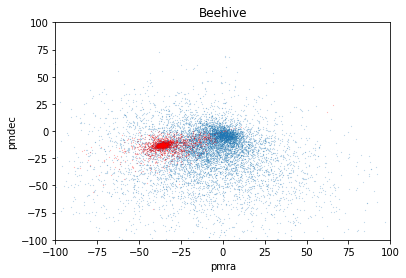

In [9]:
plt.scatter(beehive['pmra'], beehive['pmdec'], s=0.01)
plt.scatter(asu['pmRACP'], asu['pmDECP'], s=0.01, color='red')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title("Beehive")
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.show()

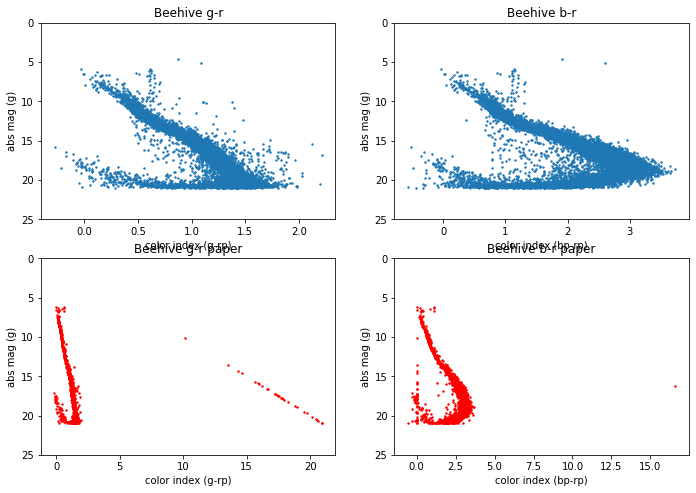

In [10]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.scatter(beehive['g_rp'], beehive['phot_g_mean_mag'], s=2)
ax.set_ylim(25, 0)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(222)
ax2.scatter(beehive['bp_rp'], beehive['phot_g_mean_mag'], s=2)
ax2.set_ylim(25, 0)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")

ax3 = fig.add_subplot(223)
ax3.scatter(asu['G-R'], asu['Gmag'], s=2, color='red')
ax3.set_ylim(25, 0)
ax3.set_title('Beehive g-r paper')
ax3.set_xlabel("color index (g-rp)")
ax3.set_ylabel("abs mag (g)")

ax4 = fig.add_subplot(224)
ax4.scatter(asu['B-R'], asu['Gmag'], s=2, color='red')
ax4.set_ylim(25, 0)
ax4.set_title('Beehive b-r paper')
ax4.set_xlabel("color index (bp-rp)")
ax4.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

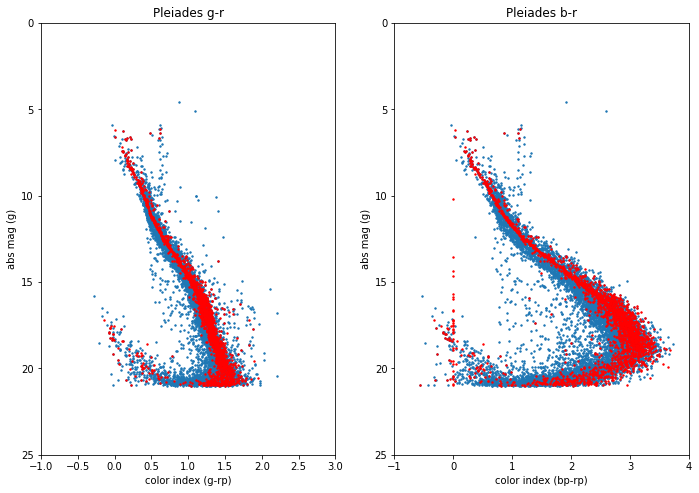

In [11]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(beehive['g_rp'], beehive['phot_g_mean_mag'], s=2)
ax.scatter(asu['G-R'], asu['Gmag'], s=2, color='red')
ax.set_xlim(-1, 3)
ax.set_ylim(25, 0)
ax.set_title('Pleiades g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(beehive['bp_rp'], beehive['phot_g_mean_mag'], s=2)
ax2.scatter(asu['B-R'], asu['Gmag'], s=2, color='red')
ax2.set_xlim(-1, 4)
ax2.set_ylim(25, 0)
ax2.set_title('Pleiades b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")


plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [12]:
b = beehive

#Trim data

#parallax error, if error is >= 1/10 of error/parallax, drop it
s = 1/10
for index, row in b.iterrows():
    if row['parallax_error']/row['parallax'] >= s:
        b = b.drop([index])

#duplicate source, if star is a duplicate drop it
for index, row in b.iterrows():
    if row['duplicated_source'] == True:
        b = b.drop([index])

#astronometric excess noise, if the noise is >= 1 drop it
s = 1
for index, row in b.iterrows():
    if row['astrometric_excess_noise'] >= s:
        #print(row['astrometric_excess_noise'])
        b = b.drop([index])

#visibility periods used, if less than 5 visibility periods drop it
s = 5
for index, row in b.iterrows():
    if row['visibility_periods_used'] <= s:
        b = b.drop([index])

#gmag, if gmag is greater than 19 drop it
#This is the only one that can't be generalized
s = 19
for index, row in b.iterrows():
    if row['phot_g_mean_mag'] > s:
        b = b.drop([index])

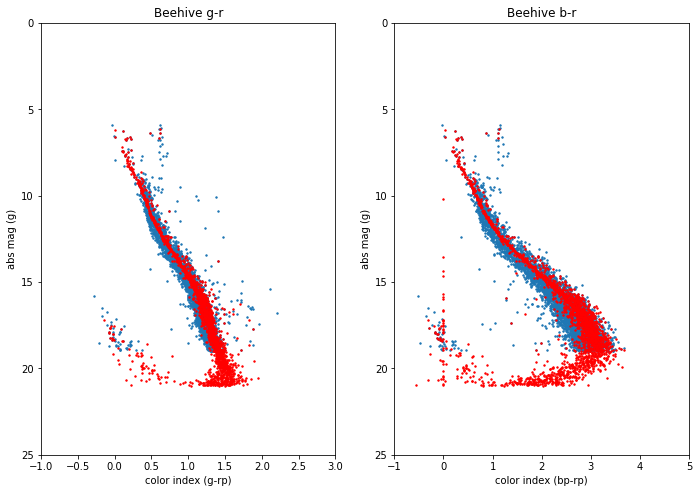

In [13]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(b['g_rp'], b['phot_g_mean_mag'], s=2)
ax.scatter(asu['G-R'], asu['Gmag'], s=2, color='red')
ax.set_xlim(-1, 3)
ax.set_ylim(25, 0)
ax.set_title('Beehive g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(b['bp_rp'], b['phot_g_mean_mag'], s=2)
ax2.scatter(asu['B-R'], asu['Gmag'], s=2, color='red')
ax2.set_xlim(-1, 5)
ax2.set_ylim(25, 0)
ax2.set_title('Beehive b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")


plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

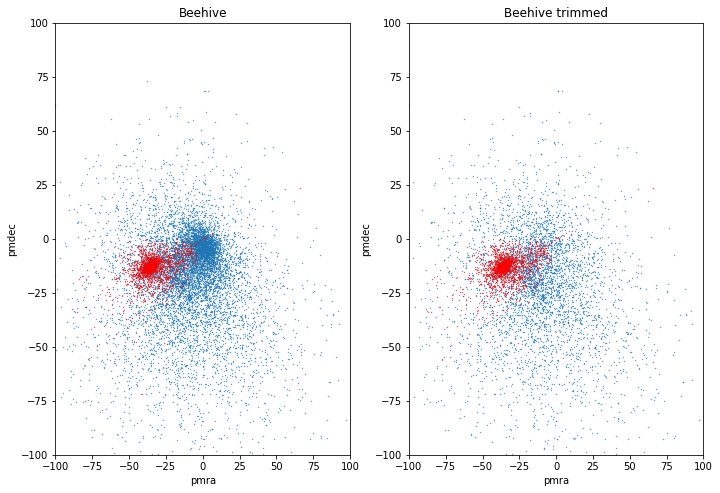

In [14]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(beehive['pmra'], beehive['pmdec'], s=0.1)
ax.scatter(asu['pmRACP'], asu['pmDECP'], s=0.1, color='red')
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_title('Beehive')
ax.set_xlabel("pmra")
ax.set_ylabel("pmdec")

ax2 = fig.add_subplot(122)
ax2.scatter(b['pmra'], b['pmdec'], s=0.1)
ax2.scatter(asu['pmRACP'], asu['pmDECP'], s=0.1, color='red')
ax2.set_xlim(-100, 100)
ax2.set_ylim(-100, 100)
ax2.set_title('Beehive trimmed')
ax2.set_xlabel("pmra")
ax2.set_ylabel("pmdec")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [15]:
# Stars total in ASU between 19 and 5 gmag
count = 0
arr = []
for star in asu.itertuples():
    if star.Gmag <= 19 and star.Gmag >= 5:
        arr.append([star.ra_deg, star.dec_deg])
        count += 1
print(count)

data = np.array(arr)

df_hr_asu = pd.DataFrame(data, columns=['ra', 'dec'])
df_hr_asu = df_hr_asu.round(4)
df_hr_asu.head(10)

1642


,ra,dec
0,118.8500,18.7349
1,119.3117,20.4751
2,119.4724,23.3709
3,120.1400,20.9366
4,120.1411,21.4927
5,120.2340,21.5867
6,120.2775,16.1943
7,120.2985,19.8786
8,120.3585,22.4570
9,120.4066,17.4953


In [16]:
# Stars in total my dataset between HR 19 and 5 gmag
count = 0
arr = []
for star in b.itertuples():
    if star.phot_g_mean_mag <= 19 and star.phot_g_mean_mag >= 5:
        arr.append([star.ra, star.dec])
        count += 1
print(count)

data = np.array(arr)

df_hr_beehive = pd.DataFrame(data, columns=['ra', 'dec'])
df_hr_beehive = df_hr_beehive.round(4)
df_hr_beehive

5613


,ra,dec
0,134.2601,20.6333
1,134.0144,20.9532
2,134.8603,20.8010
3,134.1168,20.3904
4,134.9167,21.0997
...,...,...
5608,134.6068,18.1654
5609,134.5496,17.9882
5610,134.5761,18.3082
5611,134.0467,18.2078


In [17]:
# Stars in common based on RA
correct = 0
incorrect = 0
mergedStuffRA = pd.merge(df_hr_beehive, df_hr_asu, on=['ra'], how='inner')
beehive_c = []
for star in mergedStuffRA.itertuples():
    if star.dec_x == star.dec_y: #compare DEC's of same RA's
        correct += 1
        beehive_c.append(star)
    else:
        incorrect += 1
print("Stars in common RA: ", len(mergedStuffRA))
print("Beehive correctly identified: ", correct)
print("Beehive incorrectly identified: ", incorrect)

Stars in common RA:  1101
Beehive correctly identified:  900
Beehive incorrectly identified:  201


In [18]:
b_temp = b.round(4)

beehive_correct = pd.DataFrame(data=beehive_c)

df_bc_id = pd.Series(list(beehive_correct['ra']))
beehive_f = []
for star in b_temp.itertuples():
    if star.ra in df_bc_id.unique():
        beehive_f.append(star)
beehive_final_ra = pd.DataFrame(data=beehive_f)
print(len(beehive_final_ra))

954


In [19]:
# Stars in common based on DEC
correct = 0
incorrect = 0
mergedStuffDEC = pd.merge(df_hr_beehive, df_hr_asu, on=['dec'], how='inner')
beehive_c = []
for star in mergedStuffDEC.itertuples():
    if star.ra_x == star.ra_y: #compare RA's of same DEC
        correct += 1
        beehive_c.append(star)
    else:
        incorrect += 1
print("Stars in common DEC: ", len(mergedStuffDEC))
print("Beehive correctly identified: ", correct)
print("Beehive incorrectly identified: ", incorrect)

Stars in common DEC:  1142
Beehive correctly identified:  900
Beehive incorrectly identified:  242


In [20]:
b_temp = b.round(4)

beehive_correct = pd.DataFrame(data=beehive_c)

df_bc_id = pd.Series(list(beehive_correct['dec']))
beehive_f = []
for star in b_temp.itertuples():
    if star.dec in df_bc_id.unique():
        beehive_f.append(star)
beehive_final_dec = pd.DataFrame(data=beehive_f)
print(len(beehive_final_dec))

948


In [21]:
# Compare combined RA with combined DEC

df_dec_id = pd.Series(list(beehive_final_dec['dec']))
df_ra_id = pd.Series(list(beehive_final_ra['ra']))
beehive_temp = []
for star in b_temp.itertuples():
    if star.dec in df_dec_id.unique() and star.ra in df_ra_id.unique():
        beehive_temp.append(star)
beehive_final = pd.DataFrame(data=beehive_temp)
print(len(beehive_final))

#beehive_final (dataframe) is my "correct" stars in the Pleiades based off of the paper

903


# Machine Learning
### DBSCAN

In [22]:
import math
import csv
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

df_pm = beehive[['pmra', 'pmdec', 'source_id']]
X = df_pm.to_numpy()

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df_pm.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df_pm, core, label]
df_pm_temp = pd.concat(frames, sort=False, axis=1)

### Using Proper Motion

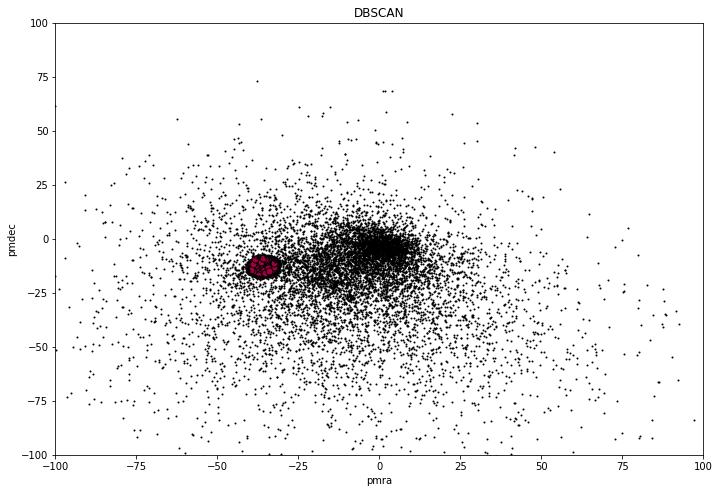

In [23]:
df = beehive[['pmra', 'pmdec']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=900).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_pm = pd.concat(frames, sort=False, axis=1)

# Number of clusters in labels, ignoring anomolies
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.title("DBSCAN")
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [24]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  8951
Beehive:  1655


In [25]:
df_temp = df_pm_temp[['source_id']]
frames = [df_temp, df_pm]
df_pm_final = pd.concat(frames, sort=False, axis=1)

In [26]:
# Compare against the trimmed HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(b['source_id']))
for star in df_pm_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct) # Correct == HR digram
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  1270
Beehive incorrectly clustered:  385


In [27]:
# Compare to paper HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(beehive_final['source_id']))
for star in df_pm_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  845
Beehive incorrectly clustered:  810


### Using Position

In [28]:
df = beehive[['x', 'y', 'z', 'source_id']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=100).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_xyz_temp = pd.concat(frames, sort=False, axis=1)

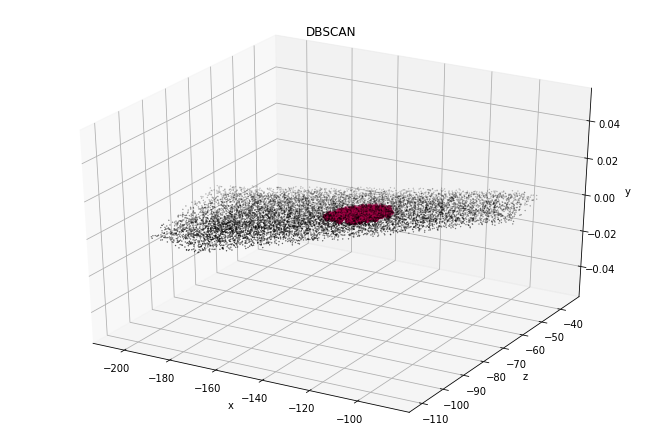

In [29]:
df = beehive[['x', 'y', 'z']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=100).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_xyz = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [30]:
anomaly = 0;
cluster = 0;

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  8916
Beehive:  1690


In [31]:
df_temp = df_xyz_temp[['source_id']]
frames = [df_temp, df_xyz]
df_xyz_final = pd.concat(frames, sort=False, axis=1)

In [32]:
# Compare against the trimmed HR diagram
correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(b['source_id']))
for star in df_xyz_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct) # Correct == HR digram
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  1178
Beehive incorrectly clustered:  512


In [33]:
# Compare to paper HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(beehive_final['source_id']))
for star in df_xyz_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  657
Beehive incorrectly clustered:  1033


### Using Position and Proper Motion

In [34]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec', 'source_id']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all_temp = pd.concat(frames, sort=False, axis=1)

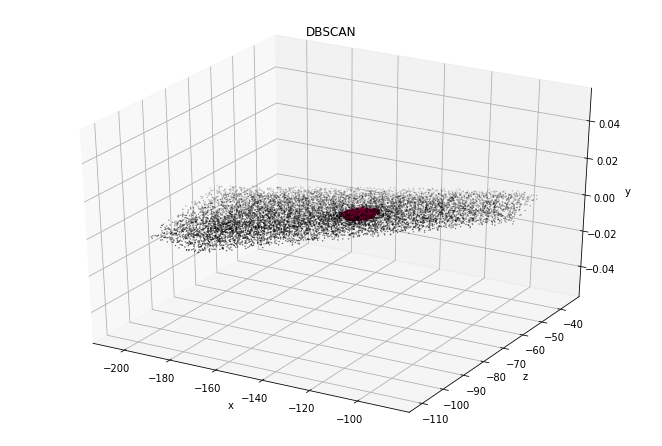

In [35]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [36]:
anomaly = 0
cluster = 0

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  9834
Beehive:  772


In [37]:
df_temp = df_all_temp[['source_id']]
frames = [df_temp, df_all]
df_all_final = pd.concat(frames, sort=False, axis=1)

In [38]:
# Compare to trimmed HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(b['source_id']))
for star in df_all_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct) # Correct == x,y,z,pm plot
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  660
Beehive incorrectly clustered:  112


In [39]:
# Compare to paper HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(beehive_final['source_id']))
for star in df_all_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  488
Beehive incorrectly clustered:  284


### Position, PM, RA, DEC

In [40]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec', 'ra', 'dec', 'source_id']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all_temp = pd.concat(frames, sort=False, axis=1)

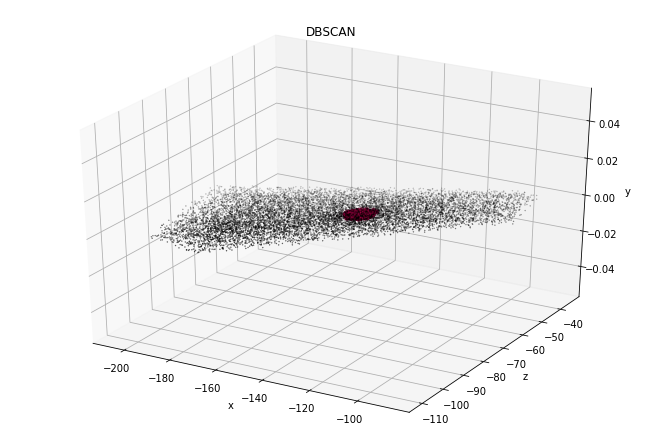

In [41]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec', 'ra', 'dec']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [42]:
anomaly = 0
cluster = 0

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  9855
Beehive:  751


In [43]:
df_temp = df_all_temp[['source_id']]
frames = [df_temp, df_all]
df_all_final = pd.concat(frames, sort=False, axis=1)

In [44]:
# Compare to paper HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(beehive_final['source_id']))
for star in df_all_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  472
Beehive incorrectly clustered:  279


### Position, PM, G Mean Mag

In [45]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec', 'phot_g_mean_mag', 'source_id']]
X = df.to_numpy()
#X.astype(np.float32)
#print(X)

db = DBSCAN(eps=5, min_samples=150).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all_temp = pd.concat(frames, sort=False, axis=1)

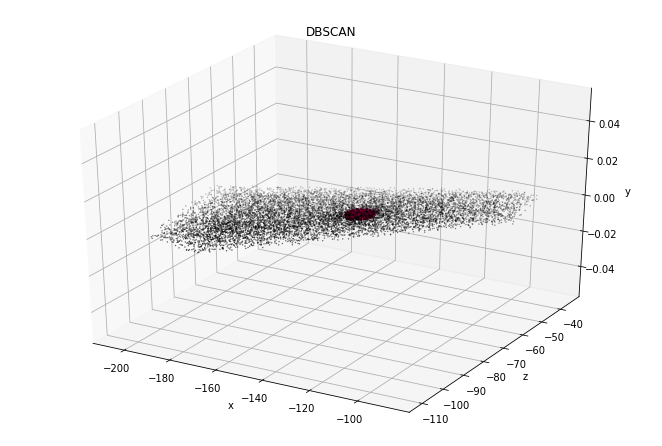

In [47]:
df = beehive[['x', 'y', 'z', 'pmra', 'pmdec', 'phot_g_mean_mag']]
X = df.to_numpy()

db = DBSCAN(eps=5, min_samples=100).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

#plt.title('Estimated number of clusters: %d' % n_clusters_)

axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [48]:
anomaly = 0
cluster = 0

for i in labels:
    if i == 0:
        cluster += 1
    else:
        anomaly += 1
        
print("Anomaly: ", anomaly)
print("Beehive: ", cluster)

Anomaly:  9925
Beehive:  681


In [49]:
df_temp = df_all_temp[['source_id']]
frames = [df_temp, df_all]
df_all_final = pd.concat(frames, sort=False, axis=1)

In [50]:
# Compare to paper HR diagram

correct = 0
incorrect = 0
temp = []
df_b_id = pd.Series(list(beehive_final['source_id']))
for star in df_all_final.itertuples():
    if star.labels == 0:
        if star.source_id in df_b_id.unique():
            temp.append(star.source_id)
            correct += 1
        else:
            incorrect += 1
print("Beehive correctly clustered: ", correct)
print("Beehive incorrectly clustered: ", incorrect)

Beehive correctly clustered:  435
Beehive incorrectly clustered:  246
